# KNN Classifier for penguins

The following exercise aims to apply a KNN classifier to distinguish different species of penguins based on the Palmer Penguins dataset imported via Seaborn. In order to better visualise the decision boundaries, 2 features were selected.

#### 1) Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


#### 2) Load data

In [2]:
# Load dataset
penguins = sns.load_dataset("penguins").dropna()

# Select two features
features = ["bill_length_mm", "bill_depth_mm"]
X = penguins[features]

# Encode species numerically
le = LabelEncoder()
y = le.fit_transform(penguins["species"])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [18]:
k = 50

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=k))
])

pipe.fit(X_train, y_train)

print("Training accuracy:", pipe.score(X_train, y_train))
print("Test accuracy:", pipe.score(X_test, y_test))

Training accuracy: 0.9527896995708155
Test accuracy: 0.93


In [19]:
# Create mesh grid
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = pd.DataFrame(
    np.column_stack([xx.ravel(), yy.ravel()]),
    columns=features   # same feature names as training data
)

In [20]:
Z = pipe.predict(grid)
Z = Z.reshape(xx.shape)

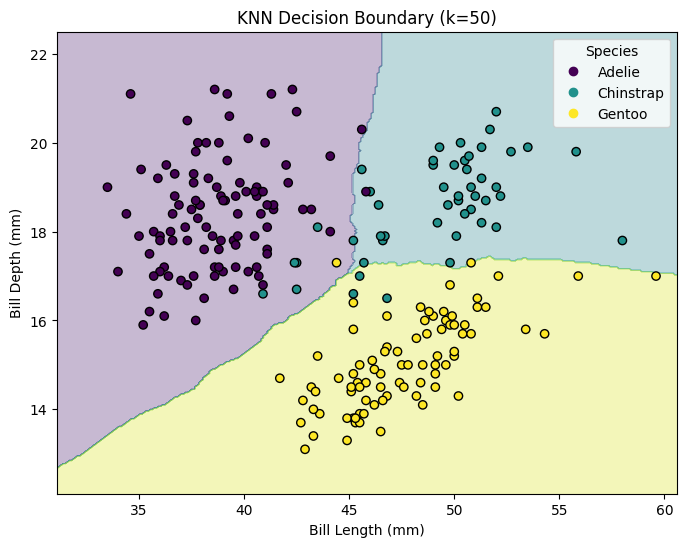

In [21]:
plt.figure(figsize=(8,6))

# Decision surface
plt.contourf(xx, yy, Z, alpha=0.3)

# Training points
scatter = plt.scatter(
    X_train.iloc[:, 0],
    X_train.iloc[:, 1],
    c=y_train,
    edgecolor="black"
)

# Legend with original species names
handles, _ = scatter.legend_elements()
plt.legend(handles, le.classes_, title="Species")

plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title(f"KNN Decision Boundary (k={k})")
plt.show()